In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
import pickle
X = pickle.load(open("X_data", "rb")) # X_data and y_data should be in the same directory as you notebook.
y = pickle.load(open("y_data", "rb"))
# we initially attempted scaling, but this did not appear to influence the results 
#scaler = StandardScaler(with_mean=False).fit(X)
#X = scaler.transform(X)

In [5]:
#set aside test data
xtrain, xtest_final, ytrain, ytest_final = train_test_split(X, y, test_size=.25)

# Approach One: Logistic Regression with L1 Penalty

In [6]:
CVmodel = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', n_jobs=-1).fit(xtrain,ytrain)

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
Cs = CVmodel.Cs_

In [61]:
scores = CVmodel.scores_[1.0]

{1.0: array([[ 0.64111415,  0.9302464 ,  0.95821926,  0.97559814,  0.98285918,
          0.98571599,  0.98702535,  0.98607309,  0.98476372,  0.95964766],
        [ 0.64111415,  0.9273896 ,  0.95441019,  0.96988454,  0.97964528,
          0.98547792,  0.98547792,  0.98262112,  0.98309725,  0.95988573],
        [ 0.64107143,  0.92809524,  0.95285714,  0.9722619 ,  0.97952381,
          0.98488095,  0.98285714,  0.98297619,  0.98285714,  0.95940476],
        [ 0.64114776,  0.93106322,  0.95392309,  0.97178236,  0.97964043,
          0.98428384,  0.98356947,  0.98273604,  0.98214073,  0.95975711],
        [ 0.64114776,  0.93046791,  0.95618526,  0.97428265,  0.98166448,
          0.98583165,  0.98476009,  0.9828551 ,  0.98237885,  0.96356709]])}

In [152]:
cvscores = np.vstack(scores)
lista = np.zeros(10)    #number of values in the CV mse list
for i in cvscores:
    val = 0
    for j in i:
        lista[val] += j
        val += 1
for i in range(len(lista)):
    lista[i] = lista[i] / 5     #divide sums by number of folds
    lista[i] = 1 - lista[i]     #make this mse instead of accuracy 
print(lista)

[ 0.35888095  0.07054753  0.04488101  0.02723808  0.01933336  0.01476193
  0.01526201  0.01654769  0.01695246  0.03954753]


In [99]:
Cs

array([  1.00000000e-04,   7.74263683e-04,   5.99484250e-03,
         4.64158883e-02,   3.59381366e-01,   2.78255940e+00,
         2.15443469e+01,   1.66810054e+02,   1.29154967e+03,
         1.00000000e+04])

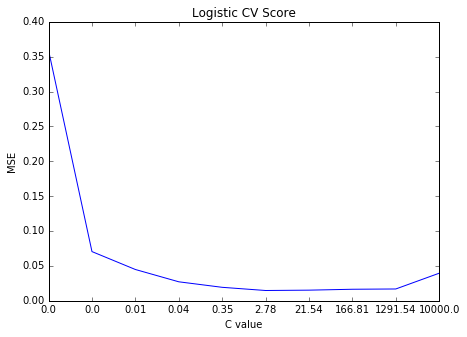

In [154]:
import matplotlib.ticker as mtick
Cs = [0.00,0.00,.01,.04, .35,2.78, 21.54, 166.81, 1291.54, 10000.00]   #hard coding this in for the graph
plt.figure(figsize=(7, 5))
plt.xticks(listb, Cs )
plt.ylabel('MSE')
plt.xlabel('C value')
plt.title('Logistic CV Score')
plt.plot(listb, lista)

In [73]:
preds = CVmodel.predict(xtest_final)

confusion matrix: 
[[8818  123]
 [  48 5011]]


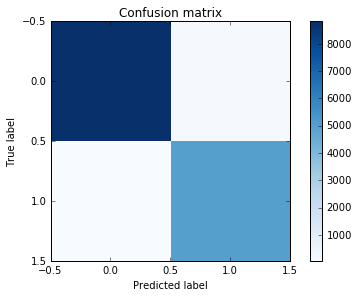

In [74]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

c_mat = confusion_matrix(ytest_final, preds)
plot_confusion_matrix(c_mat)
print("confusion matrix: ")
print(str(c_mat))

In [75]:
(8818+5011)/(48+123+8818+5011)   #percent accuracy

0.9877857142857143

# Approach Two: Random Forest Classifier 

In [174]:
X = pickle.load(open("X_data", "rb"))
y = pickle.load(open("y_data", "rb"))
xtrain, xtest_final, ytrain, ytest_final = train_test_split(X, y, test_size=.25)
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.25)

In [57]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
best_i = None
best_j = None
best_mse = float('inf')
for i in [100, 500, 1000]:
    for j in [100, 500, 1000, None]:
        classifier = RandomForestClassifier(n_estimators = i, n_jobs=3,max_depth = j)
        model = classifier.fit(x_train, y_train)
        predictions = model.predict(x_test)
        predictions = pd.DataFrame(predictions)
        #confusion_matrix = confusion_matrix(y_test, predictions)
        residuals = abs(predictions.as_matrix() - y_test)
        mse = np.mean(residuals)
        if mse < best_mse:
            best_mse - mse
            best_i = i 
            best_j = j
        print (str(mse))


        
print('best n_estimators, depth combo is: (' + str(i) + ', ' + str(j) + ')')

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.065306122449
0.0247448979592
0.0257653061224

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.0295918367347
0.060119047619

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.0251700680272
0.0269557823129

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.0258503401361
0.059693877551

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.0268707482993
0.0261904761905

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.0255952380952
best n_estimators, depth combo is: (1000, None)


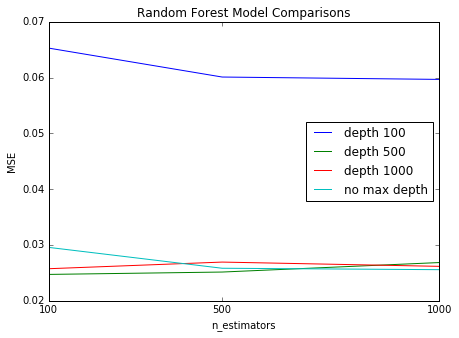

In [150]:
n_features_depth100 = [100, 500, 1000]
n_features_depth500 = [100, 500, 1000]
n_features_depth1000 = [100, 500, 1000]
n_features_depthNone = [100, 500, 1000]
mses100 = [0.065306122449,0.060119047619,0.059693877551]
mses500 = [0.0247448979592,0.0251700680272,0.0268707482993]
mses1000 = [0.0257653061224,0.0269557823129,0.0261904761905]
msesNone = [0.0295918367347,0.0258503401361,0.0255952380952]

plt.figure(figsize=(7, 5))
#plt.ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.title('Random Forest Model Comparisons')
plt.plot(n_features_depth100, mses100, label='depth 100')
plt.plot(n_features_depth500, mses500, label='depth 500')
plt.plot(n_features_depth1000, mses1000, label='depth 1000')
plt.plot(n_features_depthNone, msesNone, label='no max depth')
plt.xticks(n_features_depth100,(100,500,1000))
plt.legend(loc=7)

In [59]:
print(best_i)
print(best_j)

1000
None


In [175]:
#classifier = RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
classifier = RandomForestClassifier(n_estimators = best_i, max_depth = best_j,n_jobs=-1)
model = classifier.fit(xtrain, ytrain)
ys = pd.DataFrame(ytest_final.tolist())[0]
preds = model.predict(xtest_final)
preds = pd.DataFrame(preds.tolist())[0]
resids = abs(preds - ys)
mse = np.mean(resids)
acc_pct = 1 - mse
print("final mse is: " + str(mse))
print("model is " + str(acc_pct) + "percent accurate")

final mse is: 0.022857142857142857
model is 0.9771428571428571percent accurate


/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [157]:
ys = pd.DataFrame(ytest_final.tolist())[0]
preds = model.predict(xtest_final)
preds = pd.DataFrame(preds.tolist())[0]
resids = abs(preds - ys)
mse = np.mean(resids)
acc_pct = 1 - mse
print("final mse is: " + str(mse))
print("model is " + str(acc_pct) + " percent accurate")

final mse is: 0.021547619047619048
model is 0.978452380952381percent accurate


confusion matrix: 
[[8835  117]
 [ 203 4845]]


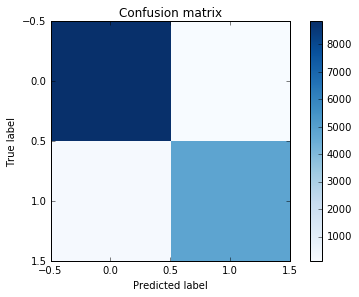

In [177]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
preds = model.predict(xtest_final)
c_mat = confusion_matrix(np.asarray(ys), np.asarray(preds))
plot_confusion_matrix(c_mat)
print("confusion matrix: ")
print(str(c_mat))


# Approach Three: Support Vector Machines

In [64]:
c_values = [.8, .9, 1, 1.1, 1.2, 1.3]
cv = KFold(n=xtrain.shape[0], n_folds = 5)

In [65]:
mse_store = []  #a list of each fold's mse list.. the value-wise means will be the CV MSEs

for train, test in cv:
    train_x = xtrain[train, :]
    train_y = ytrain[train]
    test_x = xtrain[test, :]
    test_y = ytrain[test]
    mses = []
    for i in range(len(c_values)):
        clf= LinearSVC(C = c_values[i],penalty='l1', loss='squared_hinge', dual=False)
        clf.fit(train_x, train_y) 
        preds = clf.predict(test_x)
        ys = test_y
        ys = pd.DataFrame(ys)
        ys = ys.as_matrix()
        preds = pd.DataFrame(preds)
        preds = preds.as_matrix()
        resids = abs(preds - ys)
        mse = np.mean(resids)
        mses.append(mse)
        print("done with model where C = " + str(c_values[i]) + " with MSE " + str(mse))
    mse_store.append(mses)

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


done with model where C = 0.8 with MSE 0.0147619047619
done with model where C = 0.9 with MSE 0.014880952381
done with model where C = 1 with MSE 0.015119047619

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.1 with MSE 0.0154761904762
done with model where C = 1.2 with MSE 0.0160714285714

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.3 with MSE 0.0153571428571
done with model where C = 0.8 with MSE 0.0140476190476

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 0.9 with MSE 0.0140476190476
done with model where C = 1 with MSE 0.0136904761905

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.1 with MSE 0.0141666666667
done with model where C = 1.2 with MSE 0.0145238095238

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.3 with MSE 0.0138095238095
done with model where C = 0.8 with MSE 0.0129761904762

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 0.9 with MSE 0.0139285714286
done with model where C = 1 with MSE 0.0134523809524

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.1 with MSE 0.0142857142857
done with model where C = 1.2 with MSE 0.0135714285714

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.3 with MSE 0.0139285714286
done with model where C = 0.8 with MSE 0.0167857142857

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 0.9 with MSE 0.0161904761905
done with model where C = 1 with MSE 0.0171428571429

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.1 with MSE 0.0163095238095
done with model where C = 1.2 with MSE 0.0158333333333

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.3 with MSE 0.0161904761905
done with model where C = 0.8 with MSE 0.0141666666667

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 0.9 with MSE 0.0135714285714
done with model where C = 1 with MSE 0.0139285714286

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.1 with MSE 0.0136904761905
done with model where C = 1.2 with MSE 0.0140476190476

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



done with model where C = 1.3 with MSE 0.0146428571429


In [66]:
#recover and interpret results from cross validation
cvmses = np.vstack(mse_store)
#lista = np.zeros(len(mse_store))
lista = np.zeros(6)    #number of values in the CV mse list
for i in cvmses:
    val = 0
    for j in i:
        lista[val] += j
        val += 1
for i in range(len(lista)):
    lista[i] = lista[i] / 5     #divide sums by number of folds
print(lista)

#get index of min mse. this is the index of the best C value
best_mse = float('inf')
best_c = None   #index of best mse in the list
for i in range(len(lista)):
    if lista[i] < best_mse:
        best_mse = lista[i]
        best_c = i

best_c = c_values[best_c]
best_c

[ 0.01454762  0.01452381  0.01466667  0.01478571  0.01480952  0.01478571]


0.9

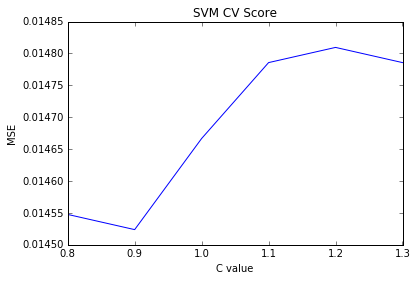

In [151]:
c_values = [.8, .9, 1, 1.1, 1.2, 1.3]
lista = [ 0.01454762,  0.01452381,  0.01466667,  0.01478571,  0.01480952,  0.01478571]
plt.plot(c_values, lista)
plt.ylabel('MSE')
plt.xlabel('C value')
plt.title('SVM CV Score')

In [67]:
clf= LinearSVC(C=best_c,penalty='l1', loss='squared_hinge', dual=False)
clf.fit(xtrain, ytrain)
preds = clf.predict(xtest_final)

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
ys = pd.DataFrame(ytest_final.tolist())[0]
preds = pd.DataFrame(preds.tolist())[0]
resids = abs(preds - ys)
mse = np.mean(resids)
print("final mse is: " + str(mse))

acc_pct = 1 - mse

final mse is: 0.012571428571428572


confusion matrix: 
[[8811  130]
 [  46 5013]]


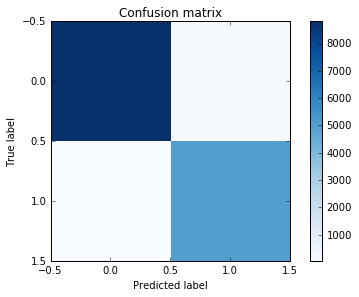

In [69]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

c_mat = confusion_matrix(ys, preds)
plot_confusion_matrix(c_mat)
print("confusion matrix: ")
print(str(c_mat))

In [70]:
1-mse  #percent accuracy

0.9874285714285714